## Project Machine Learning

In [39]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [40]:
df_airbnb = pd.read_csv("https://raw.githubusercontent.com/gabriela-cl/ml_project/main/Data%20Frame/airbnb.csv")
pd.set_option('display.max_columns', None)

In [41]:
df_airbnb.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [42]:
df_airbnb.shape

(12805, 23)

In [43]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

### Checking & Cleaning

In [44]:
df_airbnb.isnull().values.sum()

3258

In [45]:
df_airbnb.isna().sum()

Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

In [46]:
df_airbnb["checkout"].unique()

array([' 12 00 pm', ' 10 00 am', ' 11 00 am', nan, ' 3 00 pm', ' 1 00 pm',
       ' 12 00 am', ' 6 00 pm', ' 4 00 pm', ' 5 00 pm', ' 9 00 am',
       ' 2 00 pm', ' 8 00 am', ' 7 00 am', ' 1 00 am', ' 2 00 am',
       ' 11 00 pm', ' 10 00 pm', ' 3 00 am', ' 8 00 pm', ' 7 00 pm',
       ' 4 00 am'], dtype=object)

In [47]:
#droping these because many null vallues and not relevant
df_airbnb.drop(columns=["checkin", "checkout"], inplace = True)

In [48]:
#not relevant
df_airbnb.drop(columns=["Unnamed: 0", "name", "host_name", "safety_rules", "hourse_rules", "img_links", "id", "host_id"], inplace = True)

In [49]:
#redundant
df_airbnb.drop(columns=["features", "address"], inplace = True)

In [50]:
df_airbnb

,rating,reviews,amenities,price,country,bathrooms,beds,guests,toiles,bedrooms,studios
0,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,Turkey,1,1,2,0,2,0
1,New,0,"Kitchen,Wifi,Dedicated workspace,Free parking ...",4665,Turkey,2,2,4,0,2,0
2,4.85,68,"Mountain view,Kitchen,Wifi,Dedicated workspace...",5991,Georgia,1,3,4,0,1,0
3,5.0,13,"Mountain view,Valley view,Kitchen,Wifi,Free pa...",11339,Turkey,1,2,4,0,1,0
4,New,0,"Kitchen,Wifi,Free parking on premises,TV,Air c...",6673,Turkey,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12800,4.94,16,"Kitchen,Wifi,Free parking on premises,Private ...",4288,South Korea,8,0,4,0,0,0
12801,4.67,6,"Wifi,Free on-street parking,Air conditioning,G...",15200,Indonesia,0,1,2,1,1,0
12802,4.67,3,"Wifi,Breakfast,Long-term stays allowed,Unavail...",9103,Uganda,1,2,2,0,1,0
12803,4.86,7,"Kitchen,Wifi,Dedicated workspace,Free parking ...",42262,Indonesia,2,4,8,0,2,0


In [51]:
df_airbnb["amenities"].nunique()

11630

In [52]:
df_airbnb.drop(columns=["amenities"], inplace = True)

In [53]:
df_airbnb["rating"].unique()

array(['4.71', 'New', '4.85', '5.0', '4.67', '4.97', '4.89', '4.83',
       '4.87', '4.9', '4.75', '4.76', '4.84', '4.79', '4.82', '4.93',
       '4.96', '4.6', '4.64', '4.68', '4.8', '4.69', '4.58', '4.63',
       '4.91', '4.88', '4.94', '4.92', '4.86', '4.78', '4.57', '4.99',
       '4.98', '4.74', '4.7', '4.77', '4.72', '4.73', '4.95', '4.81',
       '4.53', '4.59', '4.62', '4.61', '4.51', '4.54', '4.56', '4.65',
       '4.55', '4.66', '4.52', '4.5', '4.33', '4.26', '3.33', '4.2',
       '4.0', '4.48', '4.38', '3.0', '4.49', '4.28', '4.45', '4.25',
       '4.36', '4.46', '4.44', '4.43', '3.75', '3.25', '4.13', '4.15',
       '3.88', '4.29', '4.4', '3.5', '4.31'], dtype=object)

In [54]:
count_new = df_airbnb["rating"].value_counts().get('New', 0)
print(f'Number of "New" ratings: {count_new}')

Number of "New" ratings: 4238


In [55]:
df_airbnb.drop(df_airbnb[df_airbnb["rating"] == "New"].index, inplace=True)

In [56]:
df_airbnb["studios"].unique()

array([0, 1])

In [57]:
df_airbnb

,rating,reviews,price,country,bathrooms,beds,guests,toiles,bedrooms,studios
0,4.71,64,8078,Turkey,1,1,2,0,2,0
2,4.85,68,5991,Georgia,1,3,4,0,1,0
3,5.0,13,11339,Turkey,1,2,4,0,1,0
9,4.67,3,30486,Thailand,3,6,10,0,4,0
10,4.97,77,9052,South Korea,1,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...
12800,4.94,16,4288,South Korea,8,0,4,0,0,0
12801,4.67,6,15200,Indonesia,0,1,2,1,1,0
12802,4.67,3,9103,Uganda,1,2,2,0,1,0
12803,4.86,7,42262,Indonesia,2,4,8,0,2,0


In [58]:
airbnb_df_num = df_airbnb.select_dtypes(include=['number'])

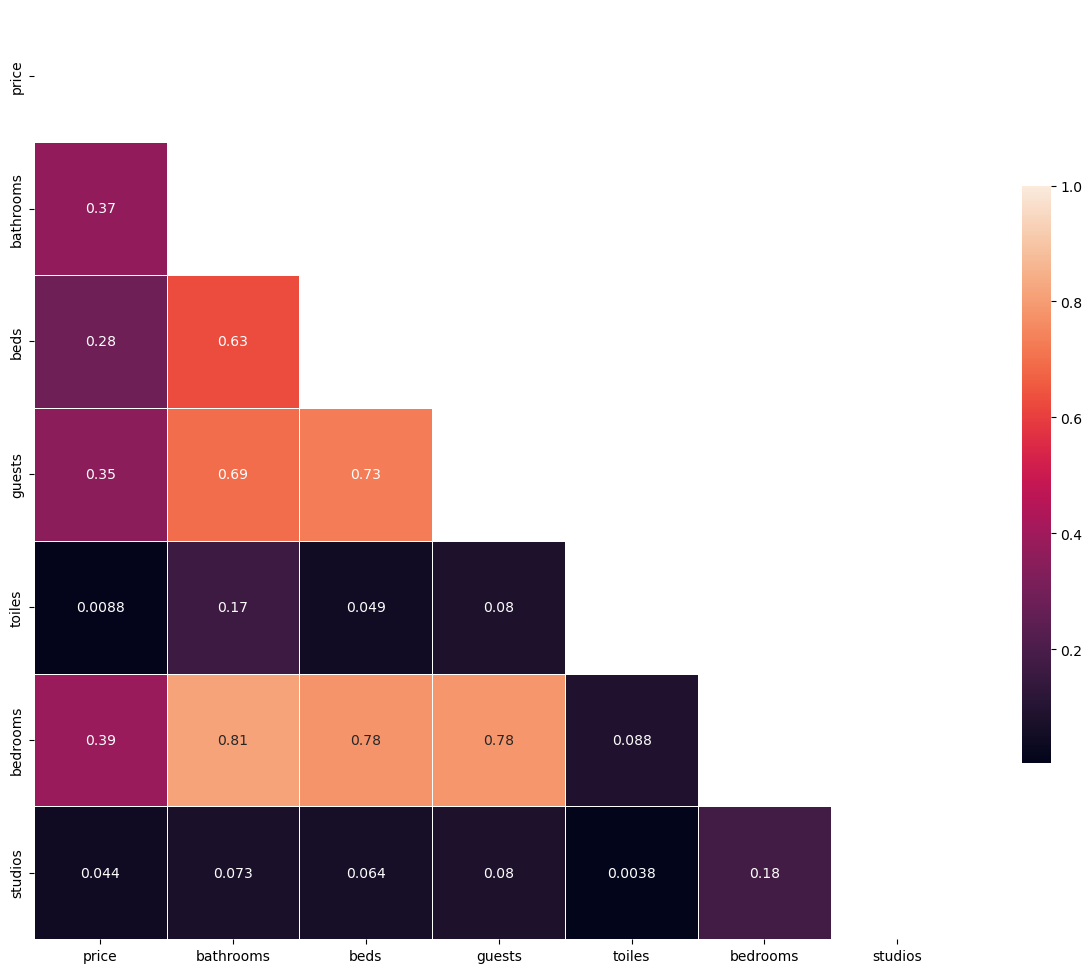

In [59]:

corr=np.abs(airbnb_df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [60]:
df_airbnb["country"].nunique()

136

In [61]:
df_airbnb["country"].unique()

array([' Turkey', ' Georgia', ' Thailand', ' South Korea', ' India',
       ' Philippines', ' Japan', ' Taiwan', ' Israel', ' Vietnam',
       ' Armenia', ' Cyprus', ' Slovakia', ' Denmark', ' Germany',
       ' Poland', ' Indonesia', ' Romania', ' Lithuania', ' Greece',
       ' Ukraine', ' Hungary', ' Albania', ' Bulgaria', ' Malaysia',
       ' Montenegro', ' Slovenia', ' Sweden', ' Croatia', ' Tanzania',
       ' Italy', ' Sri Lanka', ' Austria', 'Philippines', 'Montenegro',
       ' Bosnia & Herzegovina', ' Kenya', ' Serbia', ' Czechia',
       ' Seychelles', ' Finland', ' Norway', ' Iceland', ' United States',
       ' Canada', ' Svalbard & Jan Mayen', 'Iceland', ' France',
       ' Australia', ' Egypt', ' South Africa', ' Spain',
       ' United Arab Emirates', ' United Kingdom', ' Morocco',
       ' Pakistan', 'Thailand', ' Singapore', ' Cambodia', ' Estonia',
       ' Latvia', ' Costa Rica', ' Netherlands', ' Portugal',
       ' New Zealand', ' Panama', ' Mexico', ' Peru', ' C

In [62]:
df_airbnb["country"].value_counts().head(30)

country
 India             1464
 Greece             748
 Italy              728
 France             413
 Thailand           387
 Japan              309
 United Kingdom     296
 Georgia            247
 Morocco            234
 Germany            224
 Indonesia          208
 Sri Lanka          202
 Turkey             202
 Cuba               197
 Norway             184
 United States      176
 Taiwan             160
 Philippines        153
 South Korea        150
 Sweden             136
 Finland            113
 Poland              98
 Netherlands         88
 Croatia             77
 Romania             77
 Israel              75
 Spain               60
 Malaysia            59
 Vietnam             53
 Czechia             48
Name: count, dtype: int64

In [63]:
# Frequency count of each country
country_counts = df_airbnb['country'].value_counts()

# Get the top 20 most frequent countries
top_20_countries = country_counts.head(20).index

# Filter the DataFrame to keep only rows with countries in the top 20
df_top_20 = df_airbnb[df_airbnb['country'].isin(top_20_countries)]
df_num = df_top_20.drop(columns = ['country'])
df_num

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios
0,4.71,64,8078,1,1,2,0,2,0
2,4.85,68,5991,1,3,4,0,1,0
3,5.0,13,11339,1,2,4,0,1,0
9,4.67,3,30486,3,6,10,0,4,0
10,4.97,77,9052,1,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...
12798,4.93,44,8839,1,1,4,0,0,1
12800,4.94,16,4288,8,0,4,0,0,0
12801,4.67,6,15200,0,1,2,1,1,0
12803,4.86,7,42262,2,4,8,0,2,0


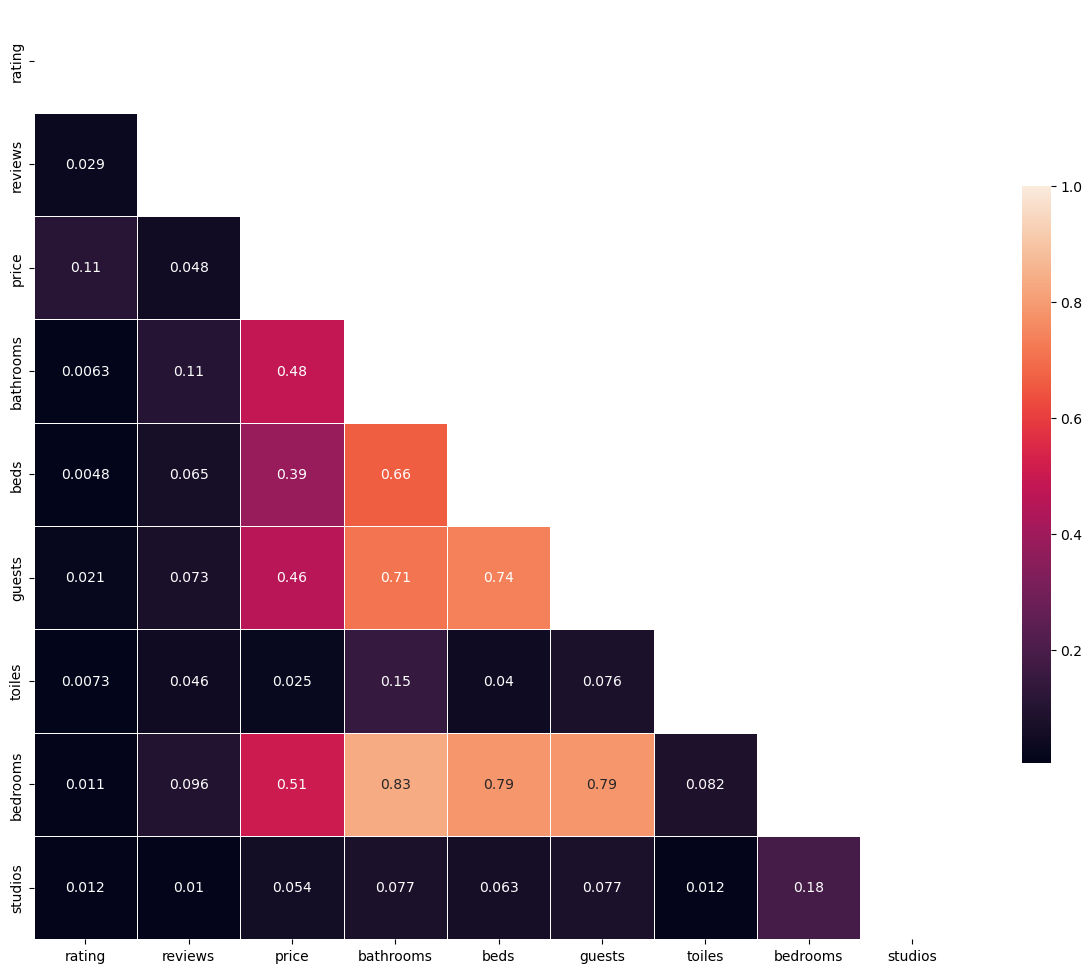

In [64]:
corr=np.abs(df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [65]:
df_top_20["country"].unique()

array([' Turkey', ' Georgia', ' Thailand', ' South Korea', ' India',
       ' Philippines', ' Japan', ' Taiwan', ' Germany', ' Indonesia',
       ' Greece', ' Sweden', ' Italy', ' Sri Lanka', ' Norway',
       ' United States', ' France', ' United Kingdom', ' Morocco',
       ' Cuba'], dtype=object)

In [66]:
df_cat = pd.get_dummies(df_top_20['country']).astype(int)

In [67]:
df_cat

,Cuba,France,Georgia,Germany,Greece,India,Indonesia,Italy,Japan,Morocco,Norway,Philippines,South Korea,Sri Lanka,Sweden,Taiwan,Thailand,Turkey,United Kingdom,United States
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12798,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12800,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12801,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12803,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Combine numerical and dummy variables DataFrames
airbnb_ml = pd.concat([df_num, df_cat], axis=1)
airbnb_ml

,rating,reviews,price,bathrooms,beds,guests,toiles,bedrooms,studios,Cuba,France,Georgia,Germany,Greece,India,Indonesia,Italy,Japan,Morocco,Norway,Philippines,South Korea,Sri Lanka,Sweden,Taiwan,Thailand,Turkey,United Kingdom,United States
0,4.71,64,8078,1,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.85,68,5991,1,3,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,13,11339,1,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,4.67,3,30486,3,6,10,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,4.97,77,9052,1,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12798,4.93,44,8839,1,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12800,4.94,16,4288,8,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12801,4.67,6,15200,0,1,2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12803,4.86,7,42262,2,4,8,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
features = airbnb_ml.drop(columns=['price'])

In [70]:
target = airbnb_ml["price"]
target

0         8078
2         5991
3        11339
9        30486
10        9052
         ...  
12798     8839
12800     4288
12801    15200
12803    42262
12804     9909
Name: price, Length: 6818, dtype: int64

### Train Test Split

In [71]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### Model Selection

**KNN**

In [72]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [73]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

- Evaluate your model's performance

In [74]:
knn.score(X_test, y_test)

0.2673383792354931

**Decision Tree**

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.1357934944956909

## New test

In [77]:
airbnb_2 = airbnb_ml.drop(columns = ["beds", "toiles"])

In [78]:
features2 = airbnb_2.drop(columns=['price'])
target2 = airbnb_2["price"]
target2

0         8078
2         5991
3        11339
9        30486
10        9052
         ...  
12798     8839
12800     4288
12801    15200
12803    42262
12804     9909
Name: price, Length: 6818, dtype: int64

In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.20, random_state=0)

In [80]:
#knn
knn2 = KNeighborsRegressor()
knn2.fit(X_train2, y_train2)
knn2.score(X_test2, y_test2)

0.28367405237504006

In [81]:
#DecisionTree
dt2 = DecisionTreeRegressor(max_depth=10)

dt2.fit(X_train2, y_train2)

dt2.score(X_test2, y_test2)

0.3227350144475376